In [5]:
#pandas y numpy

In [6]:
import pandas as pd
import numpy as np
import csv
import sklearn
import nltk
import string

In [7]:
#visualización

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

In [9]:
#Modelos de ML

In [10]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle

In [11]:
#Limpieza

In [12]:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
verdaderas = pd.read_csv(r'C:\Users\fer rios\Downloads\verdaderas.csv', header = 0)
falsas = pd.read_csv(r'C:\Users\fer rios\Downloads\falsas.csv', header = 0)

In [14]:
verdaderas["etiqueta"]=1

In [15]:
falsas["etiqueta"]=0

In [16]:
verdaderas["enlace"]=np.where(verdaderas.index % 2 == 0, 'https://www.eluniversal.com.mx/nacion/', 'https://www.eleconomista.com.mx/estados/')

falsas["enlace"]=np.where(falsas.index % 2 == 0, 'https://www.argumentopolitico.com/search/label/Pol%C3%ADtica', 'https://diariodeoaxaca.com/category/nacional/')


In [17]:
reemplazo = {
    'Sevilla': 'Ciudad de Mexico',
    'España': 'Guadalajara',
    'Madrid': 'Monterrey',
    'Valencia': 'Puebla',
    'Barcelona': 'Mérida',
    'Euro' : 'Peso'
}


In [18]:
verdaderas['text'] = verdaderas['text'].replace(reemplazo, regex = True)
falsas['text'] = falsas['text'].replace(reemplazo, regex = True)


In [19]:
def generar_fechas_aleatorias(start_date, end_date, num_dates):
    start_u = pd.to_datetime(start_date).value//10**9
    end_u = pd.to_datetime(end_date).value//10**9
    return pd.to_datetime(np.random.randint(start_u,end_u, num_dates), unit = 's').date


In [20]:
num_datos = 250


In [21]:
verdaderas.loc[:num_datos-1, 'fecha'] = generar_fechas_aleatorias('2020-01-01', '2020-12-31', num_datos)
verdaderas.loc[num_datos:2*num_datos-1, 'fecha'] = generar_fechas_aleatorias('2021-01-01', '2021-12-31', num_datos)
verdaderas.loc[2*num_datos:3*num_datos-1, 'fecha'] = generar_fechas_aleatorias('2023-01-01', '2023-12-31', num_datos)
verdaderas.loc[3*num_datos:4*num_datos-1, 'fecha'] = generar_fechas_aleatorias('2024-01-01', '2024-12-31', num_datos)

falsas.loc[:num_datos-1, 'fecha'] = generar_fechas_aleatorias('2020-01-01', '2020-12-31', num_datos)
falsas.loc[num_datos:2*num_datos-1, 'fecha'] = generar_fechas_aleatorias('2021-01-01', '2021-12-31', num_datos)
falsas.loc[2*num_datos:3*num_datos-1, 'fecha'] = generar_fechas_aleatorias('2023-01-01', '2023-12-31', num_datos)
falsas.loc[3*num_datos:4*num_datos-1, 'fecha'] = generar_fechas_aleatorias('2024-01-01', '2024-12-31', num_datos)

In [22]:

def extraer_titulo(text):
    return text.split('.')[0]


In [23]:
verdaderas['titulo'] = verdaderas['text'].apply(extraer_titulo)


verdaderas['titulo'] = verdaderas['text'].apply(lambda x: x.split('.')[0])


falsas['titulo'] = falsas['text'].apply(lambda x: x.split('.')[0])


In [24]:
#UNIMOS LOS DATASETS

In [25]:
news = pd.concat([verdaderas,falsas], axis = 0).reset_index(drop = True)

In [26]:
#Agregamos valores nulos

In [27]:
indices_aleatorios = np.random.choice(news.index,100, replace = False)
columnas = ['text', 'fecha']
for columna in columnas:
    news.loc[indices_aleatorios, columna] = np.nan

In [28]:
#CONVERTIMOS EN CSV

In [29]:
news.to_csv('news.csv', index = False)


In [30]:
#MOSTRAMOS EL ARCHIVO

In [31]:
news

,text,etiqueta,enlace,fecha,titulo
0,Algunas de las voces extremistas más conocida...,1,https://www.eluniversal.com.mx/nacion/,2020-05-17,Algunas de las voces extremistas más conocida...
1,Después de casi dos años y medio de luchas po...,1,https://www.eleconomista.com.mx/estados/,2020-03-04,Después de casi dos años y medio de luchas po...
2,Dos periodistas birmanos de la agencia Reuter...,1,https://www.eluniversal.com.mx/nacion/,2020-05-13,Dos periodistas birmanos de la agencia Reuter...
3,El Cuerpo Nacional de Policía ha detenido a c...,1,https://www.eleconomista.com.mx/estados/,2020-12-22,El Cuerpo Nacional de Policía ha detenido a c...
4,El desfile de la firma en Roma se convierte e...,1,https://www.eluniversal.com.mx/nacion/,2020-10-22,El desfile de la firma en Roma se convierte e...
...,...,...,...,...,...
1995,Reenviado... Me acaban de llegar a casa por co...,0,https://diariodeoaxaca.com/category/nacional/,2024-12-07,Reenviado
1996,"JULIO ANGUITA: ""El que debería estar en la cár...",0,https://www.argumentopolitico.com/search/label...,2024-11-22,"JULIO ANGUITA: ""El que debería estar en la cár..."
1997,Otegi reclama la salida de prisión de todos lo...,0,https://diariodeoaxaca.com/category/nacional/,2024-03-18,Otegi reclama la salida de prisión de todos lo...
1998,Otegi reclama la salida de prisión de todos lo...,0,https://www.argumentopolitico.com/search/label...,2024-04-18,Otegi reclama la salida de prisión de todos lo...


In [32]:
#Obtenemos info del dataset HASTA AQUÍ LLEGÓ EL 2DO AVANCE

In [33]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      1900 non-null   object
 1   etiqueta  2000 non-null   int64 
 2   enlace    2000 non-null   object
 3   fecha     1900 non-null   object
 4   titulo    2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [34]:
#Rellenamos valores nulos

In [35]:
news['text'] = news['text'].fillna('')
news['fecha'] = news['fecha'].fillna('')


In [36]:
news.astype({'etiqueta': 'category'}).dtypes

text          object
etiqueta    category
enlace        object
fecha         object
titulo        object
dtype: object

In [37]:
print(news.columns)

Index(['text', 'etiqueta', 'enlace', 'fecha', 'titulo'], dtype='object')


In [38]:
#DATACLEANING

In [39]:
stop_words = list(stopwords.words('spanish'))
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [40]:
#Como no tiene todas las preposiciones en Español, agregamos las faltantes

In [41]:
stop_words.extend(['según','tras','cabe','bajo', 'durante', 'mediante', 'so','toda','todas','cada','me','después','despues','segun','solo','sido','estan','lunes','martes','miércoles','jueves','viernes'])

In [42]:
#LIMPIAMOS EL DATASET (limpiamos las noticias): función

In [43]:
nltk.download('punkt_tab')
def preprocess(text):
    # Tokeniza el texto
    tokens = word_tokenize(text, language='spanish')
    # Filtra stopwords y tokens de longitud <= 3
    resultado = [token for token in tokens if token not in stop_words and len(token) > 3]
    return resultado

[nltk_data] Downloading package punkt_tab to C:\Users\fer
[nltk_data]     rios\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [44]:
#Aplicamos la función al dataframe

In [45]:
news['clean_text'] = news['text'].apply(preprocess)

In [46]:
#Antes mostraba todo el corpus

In [47]:
news['text'][0]

' Algunas de las voces extremistas más conocidas de EE.UU., cuentas asociadas con al movimiento de la conocida como alt-right o ligadas a grupos antisemitas o xenófobos , han sido eliminadas de un plumazo de la redes sociales Facebook e Instagram. Se trat'

In [48]:
#Ahora muestra el corpus tokenizado

In [49]:
print(news['clean_text'][0])

['Algunas', 'voces', 'extremistas', 'conocidas', 'EE.UU.', 'cuentas', 'asociadas', 'movimiento', 'conocida', 'alt-right', 'ligadas', 'grupos', 'antisemitas', 'xenófobos', 'eliminadas', 'plumazo', 'redes', 'sociales', 'Facebook', 'Instagram', 'trat']


In [50]:
news['palabras_juntas'] = news['clean_text'].apply(lambda x: " " .join(x))

In [51]:
news

,text,etiqueta,enlace,fecha,titulo,clean_text,palabras_juntas
0,Algunas de las voces extremistas más conocida...,1,https://www.eluniversal.com.mx/nacion/,2020-05-17,Algunas de las voces extremistas más conocida...,"[Algunas, voces, extremistas, conocidas, EE.UU...",Algunas voces extremistas conocidas EE.UU. cue...
1,Después de casi dos años y medio de luchas po...,1,https://www.eleconomista.com.mx/estados/,2020-03-04,Después de casi dos años y medio de luchas po...,"[Después, casi, años, medio, luchas, políticas...",Después casi años medio luchas políticas judic...
2,Dos periodistas birmanos de la agencia Reuter...,1,https://www.eluniversal.com.mx/nacion/,2020-05-13,Dos periodistas birmanos de la agencia Reuter...,"[periodistas, birmanos, agencia, Reuters, libe...",periodistas birmanos agencia Reuters liberados...
3,El Cuerpo Nacional de Policía ha detenido a c...,1,https://www.eleconomista.com.mx/estados/,2020-12-22,El Cuerpo Nacional de Policía ha detenido a c...,"[Cuerpo, Nacional, Policía, detenido, cuatro, ...",Cuerpo Nacional Policía detenido cuatro person...
4,El desfile de la firma en Roma se convierte e...,1,https://www.eluniversal.com.mx/nacion/,2020-10-22,El desfile de la firma en Roma se convierte e...,"[desfile, firma, Roma, convierte, libertad, mu...",desfile firma Roma convierte libertad mujeres ...
...,...,...,...,...,...,...,...
1995,Reenviado... Me acaban de llegar a casa por co...,0,https://diariodeoaxaca.com/category/nacional/,2024-12-07,Reenviado,"[Reenviado, acaban, llegar, casa, correo, pape...",Reenviado acaban llegar casa correo papeletas ...
1996,"JULIO ANGUITA: ""El que debería estar en la cár...",0,https://www.argumentopolitico.com/search/label...,2024-11-22,"JULIO ANGUITA: ""El que debería estar en la cár...","[JULIO, ANGUITA, debería, cárcel, Jordi, Pujol...",JULIO ANGUITA debería cárcel Jordi Pujol corru...
1997,Otegi reclama la salida de prisión de todos lo...,0,https://diariodeoaxaca.com/category/nacional/,2024-03-18,Otegi reclama la salida de prisión de todos lo...,"[Otegi, reclama, salida, prisión, etarras, apo...",Otegi reclama salida prisión etarras apoyar in...
1998,Otegi reclama la salida de prisión de todos lo...,0,https://www.argumentopolitico.com/search/label...,2024-04-18,Otegi reclama la salida de prisión de todos lo...,"[Otegi, reclama, salida, prisión, etarras, apo...",Otegi reclama salida prisión etarras apoyar in...


In [52]:
#VISUALIZACIÓN

In [53]:
texto = " ".join(news[news.etiqueta == 1].palabras_juntas)

In [54]:
plt.figure(figsize=(6,6))
word_cloud = WordCloud(
    max_words = 1500,
    width = 3000,
    height = 1500,
    random_state = 42,
    colormap = "vlag",
    collocations = False,
    stopwords = stop_words
    ).generate(texto)


<Figure size 600x600 with 0 Axes>

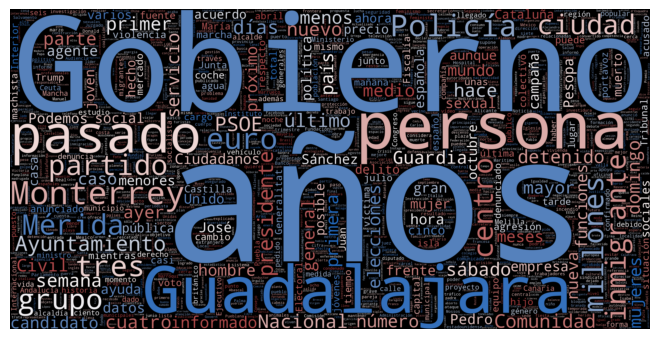

In [55]:
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [56]:

plt.show()

In [57]:
#Las palabras más comunes para las noticias reales son: gobierno, Guadalajara, años y persona.

In [58]:
tex = " ".join(news[news.etiqueta == 0].palabras_juntas)

In [59]:
plt.figure(figsize=(6,6))
              
word_cloud = WordCloud(
        max_words=1500,
        width=3000,
        height=1500,
        random_state=42,
        colormap="vlag",
        collocations=False,
        stopwords= stop_words,
        ).generate(tex)


<Figure size 600x600 with 0 Axes>

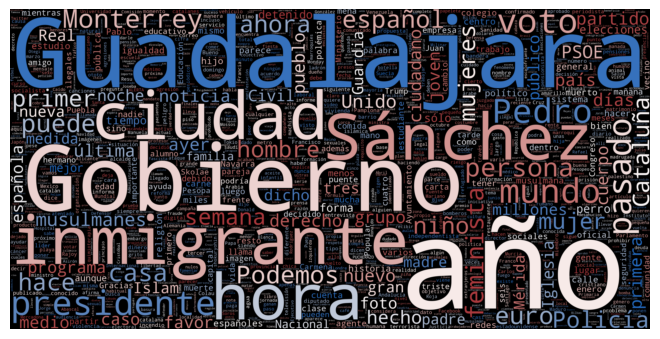

In [60]:

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)


In [61]:
plt.show()

In [62]:
#TOKENIZACION

In [63]:
X = news['palabras_juntas']
y = news['etiqueta']

In [64]:
#Ponemos los datos en el test y lo entrenamos

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [66]:
#Para tokenizar, necesitamos usar CountVectorizer.... Convierte el texto en una matriz

In [67]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(1600, 10734) (400, 10734)


In [68]:
#MODELOS DE MACHINE LEARNING

In [69]:
#RANDOM FOREST

In [70]:
modelo_1 = RandomForestClassifier(random_state = 42)
modelo_1.fit(X_train_dtm, y_train)
y_pred = modelo_1.predict(X_test_dtm)

In [71]:
precision = accuracy_score(y_test, y_pred)
print("Precisión: %.2f%%" % (precision * 100.0))

Precisión: 70.25%


In [72]:
#Regresión logistica

In [73]:
modelo_2 = LogisticRegression()
modelo_2.fit(X_train_dtm, y_train)
y_pred_modelo_2 = modelo_2.predict(X_test_dtm)

In [74]:
precision = accuracy_score(y_test, y_pred_modelo_2)
print("Precisión: %.2f%%" % (precision * 100.0))

Precisión: 75.50%


In [75]:
#EL MODELO DE REGRESIÓN TIENE LA PRECISIÓN MÁS ALTA, POR LO TANTO ES EL QUE SE USARÁ

In [76]:
print('Reporte de clasificación_\n', classification_report(y_test, y_pred_modelo_2))

Reporte de clasificación_
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       201
           1       0.79      0.70      0.74       199

    accuracy                           0.76       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.76      0.76      0.75       400



Matriz de confusión


<Axes: >

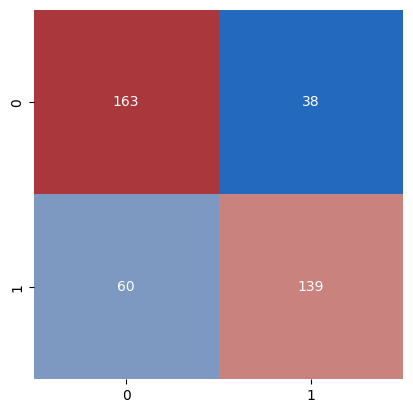

In [77]:
print("Matriz de confusión")
conf_mat = confusion_matrix(y_test, y_pred_modelo_2)
sns.heatmap(conf_mat, square = True, annot = True, cmap = "vlag", fmt = 'd', cbar = False)

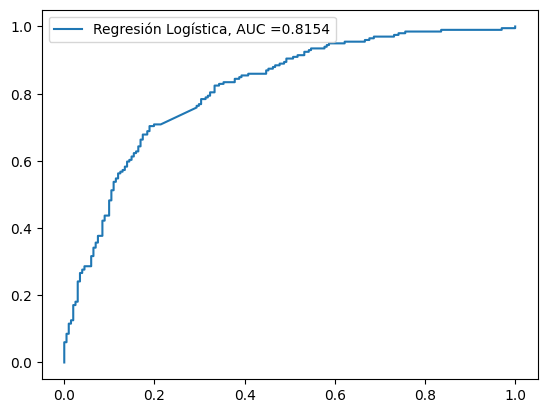

In [78]:
y_pred_probs_modelo_2 = modelo_2.predict_proba(X_test_dtm)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_modelo_2)
auc = round(roc_auc_score(y_test, y_pred_probs_modelo_2), 4)
plt.plot(fpr, tpr, label = "Regresión Logística, AUC ="+str(auc))
plt.legend()

In [79]:
#PROBAMOS EL MODELO con un dataset sacado de internet

In [80]:
test_df = pd.read_csv(r'C:\Users\fer rios\Downloads\test.csv')

In [81]:
test_df

,title,text
0,Podemos estudia en su programa playas para muj...,Spanish nationalism rabid that a Catalan compa...
1,Alemania va a quitar los hijos a los padres po...,"Su amante, llamó al marido llorando y le contó..."
2,Valencia multará los balcones con banderas por...,SUBEN LAS PENSIONES 1 EURO Y SUBEN EL RECIBO D...
3,Un directivo de Hazte Oír se besa con una muje...,"Suecia está haciendo un experimento, ha reduci..."
4,Iglesias y Montero se compran también un apart...,Suecia sigue avanzando hacia su islamización. ...
...,...,...
395,"Aumenta un 88,7% el número de autónomos mayore...",El Consejo de Gobierno ha dado su visto bueno...
396,Asesinan a un periodista involucrado en la luc...,Investigadores valencianos han desarrollado u...
397,La fértil cosecha de Porfirio Fisac en el Zara...,Los arrestados actuaban en coches y en establ...
398,Antonio Banderas: Mi novia me salvó la vida co...,El Rey ha encargado este miércoles a Pedro Sá...


In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   246 non-null    object
 1   text    400 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [83]:
test_df['texto_completo'] = test_df['title']+ test_df['text']

In [84]:
test_df

,title,text,texto_completo
0,Podemos estudia en su programa playas para muj...,Spanish nationalism rabid that a Catalan compa...,Podemos estudia en su programa playas para muj...
1,Alemania va a quitar los hijos a los padres po...,"Su amante, llamó al marido llorando y le contó...",Alemania va a quitar los hijos a los padres po...
2,Valencia multará los balcones con banderas por...,SUBEN LAS PENSIONES 1 EURO Y SUBEN EL RECIBO D...,Valencia multará los balcones con banderas por...
3,Un directivo de Hazte Oír se besa con una muje...,"Suecia está haciendo un experimento, ha reduci...",Un directivo de Hazte Oír se besa con una muje...
4,Iglesias y Montero se compran también un apart...,Suecia sigue avanzando hacia su islamización. ...,Iglesias y Montero se compran también un apart...
...,...,...,...
395,"Aumenta un 88,7% el número de autónomos mayore...",El Consejo de Gobierno ha dado su visto bueno...,"Aumenta un 88,7% el número de autónomos mayore..."
396,Asesinan a un periodista involucrado en la luc...,Investigadores valencianos han desarrollado u...,Asesinan a un periodista involucrado en la luc...
397,La fértil cosecha de Porfirio Fisac en el Zara...,Los arrestados actuaban en coches y en establ...,La fértil cosecha de Porfirio Fisac en el Zara...
398,Antonio Banderas: Mi novia me salvó la vida co...,El Rey ha encargado este miércoles a Pedro Sá...,Antonio Banderas: Mi novia me salvó la vida co...


In [85]:
#Quitamos los valores vacios

In [86]:
test_df.dropna(subset = ["texto_completo"], inplace = True)

In [87]:
test_df['texto_limpio'] = test_df['texto_completo'].apply(preprocess)

In [89]:
test_df['texto_limpio_junto'] = test_df['texto_limpio'].apply(lambda x: " " .join(x))

In [90]:
test_df

,title,text,texto_completo,texto_limpio,texto_limpio_junto
0,Podemos estudia en su programa playas para muj...,Spanish nationalism rabid that a Catalan compa...,Podemos estudia en su programa playas para muj...,"[Podemos, estudia, programa, playas, mujeres, ...",Podemos estudia programa playas mujeres musulm...
1,Alemania va a quitar los hijos a los padres po...,"Su amante, llamó al marido llorando y le contó...",Alemania va a quitar los hijos a los padres po...,"[Alemania, quitar, hijos, padres, publicacione...",Alemania quitar hijos padres publicaciones con...
2,Valencia multará los balcones con banderas por...,SUBEN LAS PENSIONES 1 EURO Y SUBEN EL RECIBO D...,Valencia multará los balcones con banderas por...,"[Valencia, multará, balcones, banderas, verlas...",Valencia multará balcones banderas verlas ropa...
3,Un directivo de Hazte Oír se besa con una muje...,"Suecia está haciendo un experimento, ha reduci...",Un directivo de Hazte Oír se besa con una muje...,"[directivo, Hazte, besa, mujer, Benidorm, sabe...",directivo Hazte besa mujer Benidorm saber tran...
4,Iglesias y Montero se compran también un apart...,Suecia sigue avanzando hacia su islamización. ...,Iglesias y Montero se compran también un apart...,"[Iglesias, Montero, compran, apartamento, Beni...",Iglesias Montero compran apartamento BenidormS...
...,...,...,...,...,...
395,"Aumenta un 88,7% el número de autónomos mayore...",El Consejo de Gobierno ha dado su visto bueno...,"Aumenta un 88,7% el número de autónomos mayore...","[Aumenta, 88,7, número, autónomos, mayores, añ...","Aumenta 88,7 número autónomos mayores años Con..."
396,Asesinan a un periodista involucrado en la luc...,Investigadores valencianos han desarrollado u...,Asesinan a un periodista involucrado en la luc...,"[Asesinan, periodista, involucrado, lucha, ébo...",Asesinan periodista involucrado lucha ébola Co...
397,La fértil cosecha de Porfirio Fisac en el Zara...,Los arrestados actuaban en coches y en establ...,La fértil cosecha de Porfirio Fisac en el Zara...,"[fértil, cosecha, Porfirio, Fisac, Zaragoza, a...",fértil cosecha Porfirio Fisac Zaragoza arresta...
398,Antonio Banderas: Mi novia me salvó la vida co...,El Rey ha encargado este miércoles a Pedro Sá...,Antonio Banderas: Mi novia me salvó la vida co...,"[Antonio, Banderas, novia, salvó, vida, aspiri...",Antonio Banderas novia salvó vida aspirina enc...


In [92]:
test_dtm = vect.transform(test_df["texto_limpio_junto"])

In [93]:
#Ya se pueden hacer predicciones

In [94]:
y_pred_test = modelo_2.predict(test_dtm)

In [95]:
test_df['etiqueta'] = pd.Series(y_pred_test).map({1:"Real", 0: "Falsa"})

In [96]:
test_df["etiqueta"].value_counts()

etiqueta
Real     85
Falsa    33
Name: count, dtype: int64